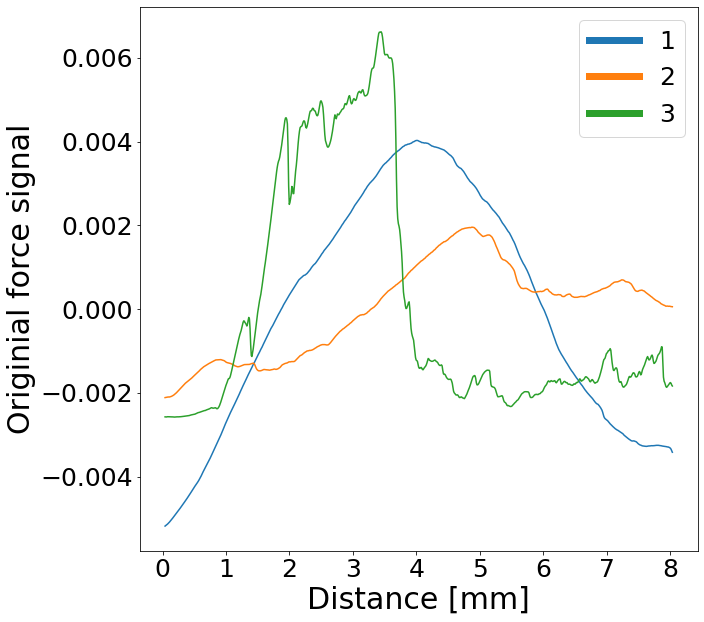

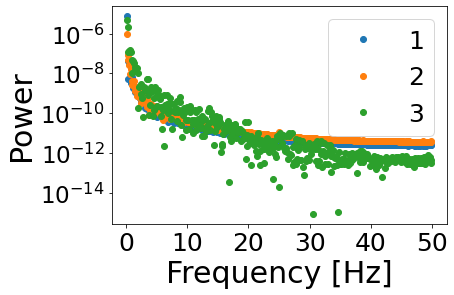

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq, ifft

#Parameters
fileName = 'mydata.csv'
LS = 30
LGS = 25
END = 805


#LoadData
df = pd.read_csv(fileName)
data = df.to_numpy()
x = data[4:END,0]
y1 = data[4:END,1]/1000
y2 = data[4:END,2]/1000
y3 = data[4:END,3]/1000
y1 = y1 - y1.mean()
y2 = y2 - y2.mean()
y3 = y3 - y3.mean()

#number of points
n = len(x)

#distance 
Lx = x[1]-x[0]

#create all necessary frequency
freqs = fftfreq(n,Lx)

#mask array to be used for power spectra
mask  = freqs > 0

#fft values
fft_vals1 = fft(y1)
fft_vals2 = fft(y2)
fft_vals3 = fft(y3)

#power spectra
ps1 = 2.0*(np.abs(fft_vals1/n)**2.0)
ps2 = 2.0*(np.abs(fft_vals2/n)**2.0)
ps3 = 2.0*(np.abs(fft_vals3/n)**2.0)

#true theoretical fft
fft_theo = 2.0*np.abs(fft_vals1/n)

plt.figure(figsize=(10,10))
plt.figure(1)
plt.plot(x,y1, label="1")
plt.plot(x,y2, label="2")
plt.plot(x,y3, label="3")
plt.xlabel("Distance [mm]", fontsize =LS)
plt.ylabel("Originial force signal", fontsize =LS)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)


leg = plt.legend(fontsize=LGS)
for line in leg.get_lines():
    line.set_linewidth(7.0)

plt.figure(2)
plt.semilogy(freqs[mask],ps1[mask],'o',label="1")
plt.semilogy(freqs[mask],ps2[mask],'o',label="2")
plt.semilogy(freqs[mask],ps3[mask],'o',label="3")
plt.xticks(fontsize=25)
plt.yticks(fontsize=23)
leg2 = plt.legend(fontsize=LGS)
plt.xlabel("Frequency [Hz]", fontsize =LS)
plt.ylabel("Power", fontsize =LS)
for line in leg2.get_lines():
    line.set_linewidth(7.0)
plt.show()